# Custom filters and other infrastructure types (Özel filtreler ve diğer altyapı türleri)

In [1]:
import osmnx as ox

%matplotlib inline
ox.settings.log_console = True
ox.__version__

'1.3.0'

Ağınıza ince ayar yapmak için özel filtreler kullanın. OSMnx, yürümeye, bisiklete binmeye, araba sürmeye vb. izin veren sokakları sorgulamak için network_type ön ayarlarını kullanır. Grafiğinizde istediğiniz belirli OSM yollarını belirtmek için bir custom_filter geçirerek bunu geçersiz kılabilirsiniz.

In [2]:
place = {"city": "Berkeley", "state": "California"}

# only get motorway ways
cf = '["highway"~"motorway"]'
G = ox.graph_from_place(place, network_type="drive", custom_filter=cf)
print(len(G), "motorway")

# only get primary ways
cf = '["highway"~"primary"]'
G = ox.graph_from_place(place, network_type="drive", custom_filter=cf)
print(len(G), "primary")

# use the pipe (|) as 'or' operator
cf = '["highway"~"motorway|primary"]'
G = ox.graph_from_place(place, network_type="drive", custom_filter=cf)
print(len(G), "motorway + primary")

34 motorway
11 primary
45 motorway + primary


In [3]:
# network of the canals of amsterdam
place = "Amsterdam, Netherlands"
G = ox.graph_from_place(place, custom_filter='["waterway"~"canal"]')# network of the canals of amsterdam
place = "Amsterdam, Netherlands"
G = ox.graph_from_place(place, custom_filter='["waterway"~"canal"]')

Bütün bir ülkenin karayolu ağını indirmek için, genellikle sorgunuzu bilgisayarınızın RAM'ine sığdırmak için yalnızca otoyollar gibi bir şeyle sınırlamanız gerekir. Belçika'nın tamamı gibi büyük sorgular için OSMnx, sorgunuzu birden çok sunucu isteğine bölerek tüm verileri indirecek ve ardından grafiği bir araya getirecektir.

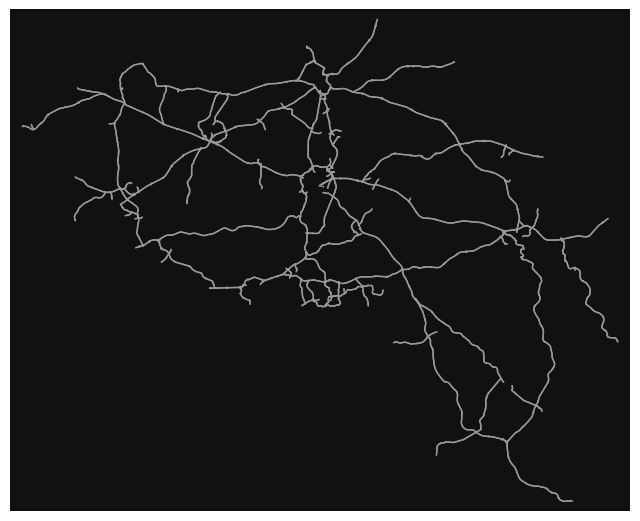

CPU times: total: 21.4 s
Wall time: 21.5 s


In [6]:
%%time
# get only motorways, trunks, and their links in all of Belgium
# takes a couple minutes to do all the downloading and processing
# OSMnx automatically divides up the query into multiple requests to not overload server (OSMnx automatically divides up the query into multiple requests to not overload server)
cf = '["highway"~"motorway|motorway_link|trunk|trunk_link"]'
G = ox.graph_from_place("Belgium", network_type="drive", custom_filter=cf)
fig, ax = ox.plot_graph(G, node_size=0)

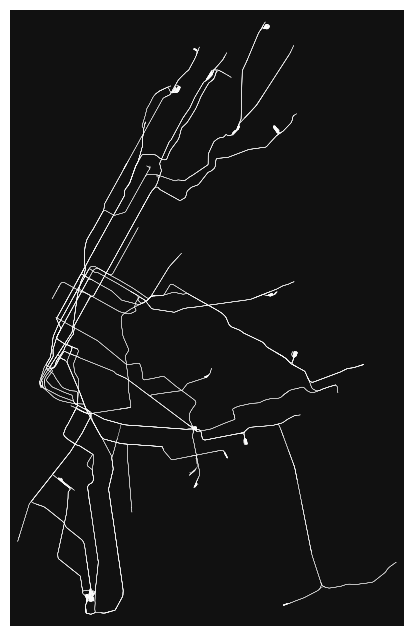

In [7]:
# get NY subway rail network
# note this is rail *infrastructure* and thus includes crossovers, sidings, spurs, yards, etc (bunun demiryolu *altyapısı* olduğunu ve bu nedenle geçitleri, dış kenarları, mahmuzları, avluları vb. içerdiğini unutmayın)
# for station-based rail network, you should download a station adjacency matrix elsewhere
ox.settings.useful_tags_way += ["railway"]
G = ox.graph_from_place(
    "New York, New York, USA",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)